In [1]:
%matplotlib inline
import numpy as np

# Increasing synaptic recruitment in a dendritic branch

We increase the number of synapses recruited in a localized region of the dendritic tree

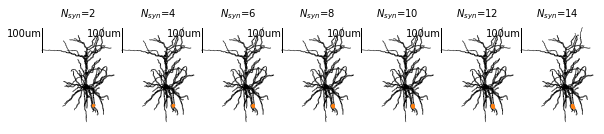

In [2]:
%run nmda-spike syn-demo

## $V_m$ response to increasing synaptic recruitment

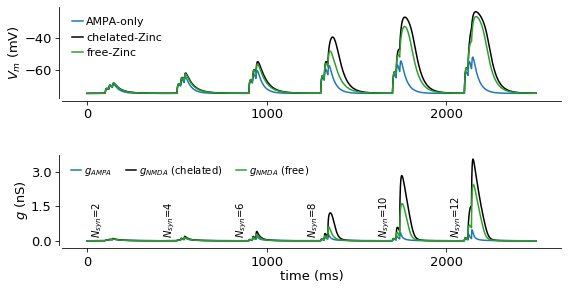

In [3]:
%run nmda-spike demo-plot

# Running this simulation across different dendritic locations 

The 25 locations are defined as a set of segments:
   - being at least 50um far from the soma
   - being adjacent to each other (i.e. remaining on the same branch)
   
We build those 25 locations by picking random segments on the branch, we check if the next 50 segments fullfill the distance and adjancency conditions, if yes, the resulting set of segments makes one "location". We show below the set of locations generated (color-coded)

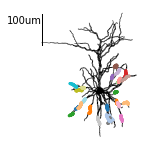

25 segments


In [4]:
%run nmda-spike locations

## Response data across all dendritic locations 

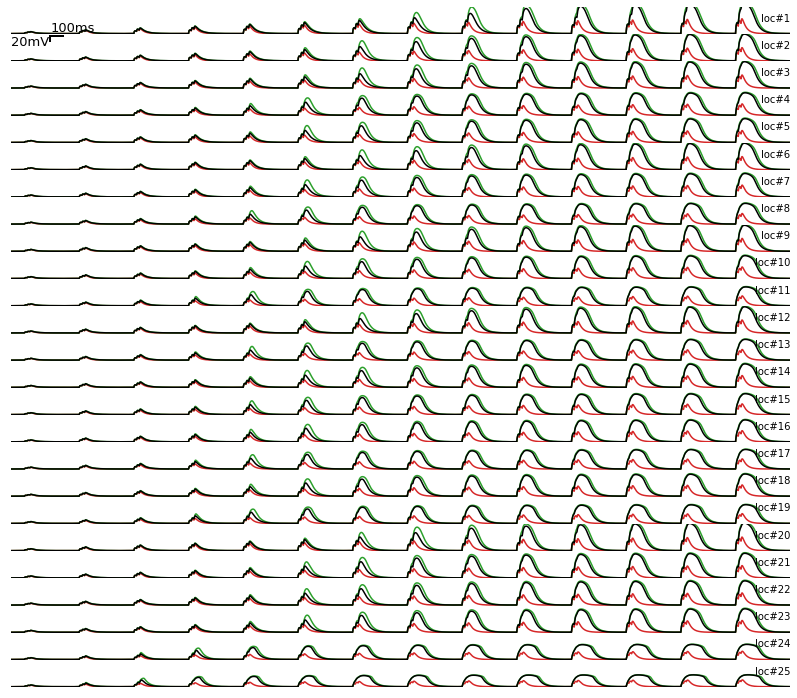

In [5]:
fig, AX = ge.figure(axes=(1, len(LOCs)), figsize=(2.5,.3), hspace=0)
for i, loc in enumerate(LOCs):
    data = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color=ge.red)
    data = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color=ge.green)
    data = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color='k')
    ge.annotate(AX[i], 'loc#%i' % (i+1), (1.,.4), size='xx-small', ha='right')
    ge.set_plot(AX[i], [], xlim=[data['t'][0], data['t'][-1]], ylim=[-76, -30])
ge.draw_bar_scales(AX[1], Xbar=100, Ybar=10, loc='left-top', Xbar_label='100ms', Ybar_label='20mV', lw=2)

# Now summarizing those data

In [12]:
#

def get_integral_after_third_pulse(loc, NSYNs=None,
                                   integral_interval=[40, 100]):
    """
    
    """
    data0 = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    if NSYNs is None:
        NSYNs = np.sort(np.unique(data0['NSYNs']))
    data1 = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    data2 = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    area0, area1, area2 = 0*NSYNs, 0*NSYNs, 0*NSYNs
    for i in range(len(NSYNs)):
        insyn = np.argwhere(data0['NSYNs']==NSYNs[i])[0][0]
        Third_pulse_cond = (data0['t']>data0['events'][insyn]+integral_interval[0]) &\
                                (data0['t']<data0['events'][insyn]+integral_interval[1])
        area0[i] = np.trapz(data0['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
        area1[i] = np.trapz(data1['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
        area2[i] = np.trapz(data2['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
    return NSYNs, area0, area1, area2


def get_max_depol_response(loc, NSYNs=None,
                     max_interval=[0, 100]):
 
    data0 = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    if NSYNs is None:
        NSYNs = np.sort(np.unique(data0['NSYNs']))
    data1 = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    data2 = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    depol0, depol1, depol2 = 0*NSYNs, 0*NSYNs, 0*NSYNs
    for i in range(len(NSYNs)):
        insyn = np.argwhere(data0['NSYNs']==NSYNs[i])[0][0]
        max_cond = (data0['t']>data0['events'][insyn]+max_interval[0]) &\
        (data0['t']<data0['events'][insyn]+max_interval[1])
        depol0[i] = np.max(data0['Vm_soma'][max_cond])
        depol1[i] = np.max(data1['Vm_soma'][max_cond])
        depol2[i] = np.max(data2['Vm_soma'][max_cond])
    return NSYNs, depol0, depol1, depol2

def plot_nmda_effect(loc=5,
                     method='peak-Vm',
                     NSYNs = None,
                     ax=None):
    
    if ax is None:
        fig, ax = ge.figure()
    
    if method=='integral':
        NSYNs, x0, x1, x2 = get_integral_after_third_pulse(LOCs[loc], NSYNs=NSYNs)
        ylabel = 'Integral (mV.ms)    '
    if method=='derivative':
        NSYNs, x0, x1, x2 = get_integral_after_third_pulse(LOCs[loc], NSYNs=NSYNs)
        NSYNs, x0, x1, x2 = .5*(NSYNs[1:]+NSYNs[:-1]), np.diff(x0), np.diff(x1), np.diff(x2)
        ylabel = 'Integral deriv. (mV)    '
    elif method=='peak-Vm':
        NSYNs, x0, x1, x2 = get_max_depol_response(LOCs[loc], NSYNs=NSYNs)
        ylabel = 'peak $V_m$ (mV)    '
        
    ge.plot(NSYNs ,Y=[x0, x1, x2], ax=ax, no_set=True, COLORS=[ge.blue, ge.green, 'k'], lw=2)
    ge.annotate(ax, 'AMPA only', (0.4, 0.05), color=ge.blue, size='small', bold=True)
    ge.annotate(ax, 'chelated\n    Zinc', (0.02, 0.7), color=ge.green, size='small', bold=True)
    ge.annotate(ax, 'free Zinc', (0.52, 0.45), color='k', size='small', bold=True)
    #ge.title(ax, 'NMDA-mediated effect')
    ge.set_plot(ax, ylabel=ylabel, xlabel='# act. synapses, $N_{syn}$    ')
    

# Peak Response

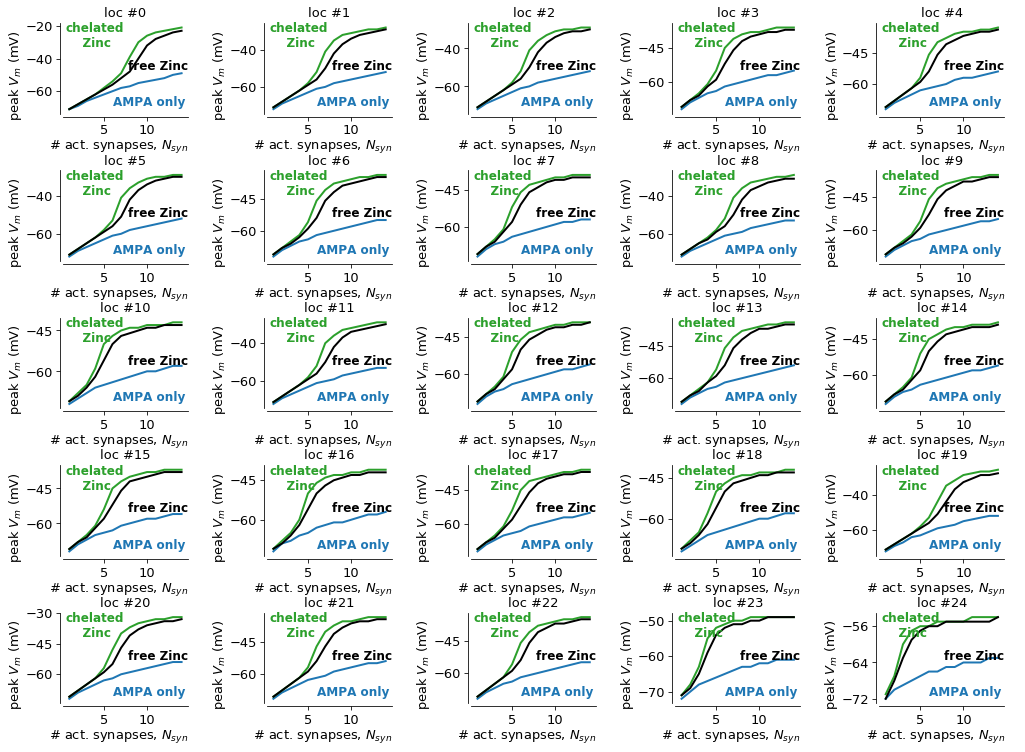

In [7]:
locs = range(25)
_, AX = ge.figure(axes=(5,5))

for loc, ax in zip(locs, ge.flat(AX)):
    ge.title(ax, 'loc #%i' % loc)
    plot_nmda_effect(loc=loc, ax=ax)

# Integral Response

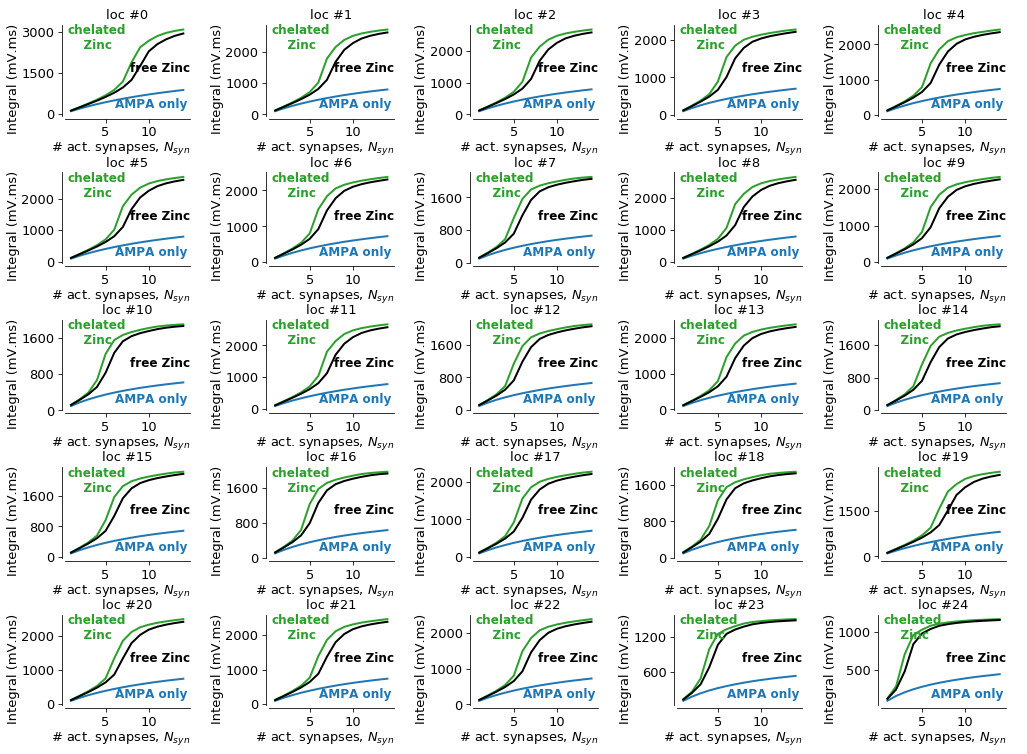

In [8]:
locs = range(25)
_, AX = ge.figure(axes=(5,5))

for loc, ax in zip(locs, ge.flat(AX)):
    ge.title(ax, 'loc #%i' % loc)
    plot_nmda_effect(loc=loc, ax=ax, method='integral')

## Fit a sigmoid and evaluate the shift in Full-width-half-maximum of the integral

In [9]:
from scipy.optimize import minimize

def sigmoid_func(x, x0=0, sx=1.):
    return 1./(1+np.exp(-(x-x0)/(1e-6+np.abs(sx))))

FWHM, WIDTH, AMP = {}, {}, {}
for key in ['AMPA', 'freeZn', 'chelatedZn']:
    FWHM[key], WIDTH[key], AMP[key] = [], [], []
    
for i in range(25):
    NSYNs, x0, x1, x2 = get_integral_after_third_pulse(LOCs[i])
    
    for key, x in zip(['AMPA', 'chelatedZn', 'freeZn'], [x0, x1, x2]):
        def to_minimize(coefs):
            return np.sum((x-coefs[0]*sigmoid_func(NSYNs, coefs[1], coefs[2]))**2)
        res = minimize(to_minimize, [x2.max(), np.mean(NSYNs), np.std(NSYNs)])
        AMP[key].append(res.x[0])
        FWHM[key].append(res.x[1])
        WIDTH[key].append(res.x[2])
        

WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
 [py.warnings]


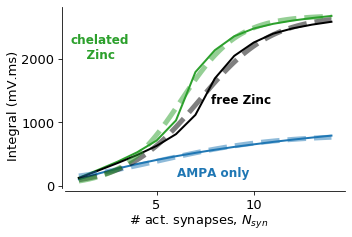

In [10]:
# showing the accuracy fit on the some example data
loc = 2 #
fig, ax = ge.figure(figsize=(1.5,2))
plot_nmda_effect(loc=loc, ax=ax, method='integral')
NSYNs, x0, x1, x2 = get_integral_after_third_pulse(LOCs[loc])
for key, c in zip(['AMPA', 'freeZn', 'chelatedZn'], [ge.blue, 'k', ge.green]):
    x = np.linspace(NSYNs[0], NSYNs[-1], 100)
    ax.plot(x, AMP[key][loc]*sigmoid_func(x, FWHM[key][loc], WIDTH[key][loc]), '--',
            color=c, lw=5, alpha=.5)

# producing summary data

from paired t-test, pval= 1.25797911212645e-19


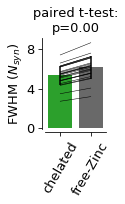

In [11]:
fig, ax, pval = ge.related_samples_two_conditions_comparison(FWHM['chelatedZn'], FWHM['freeZn'],
                                             color1=ge.green, color2='dimgrey',
                                             xticks_labels=['chelated', 'free-Zinc'],
                                             ylabel='FWHM ($N_{syn}$)',
                                            xticks_rotation=60)
print('from paired t-test, pval=', pval)

# Derivative-based estimate of FWHM

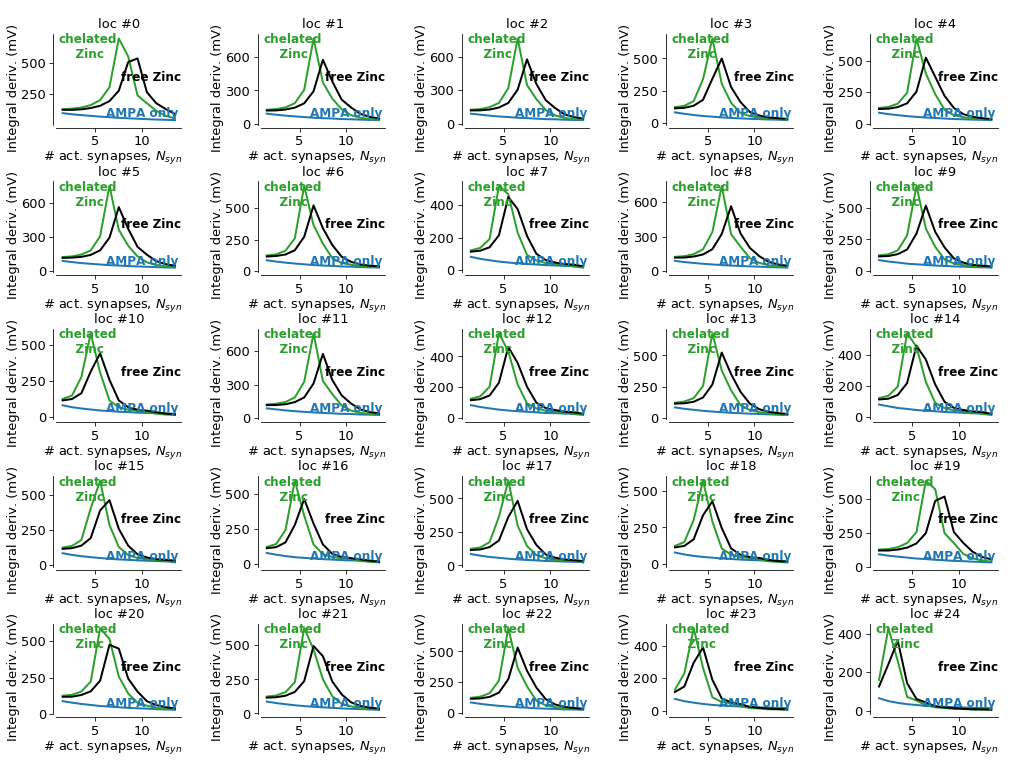

In [17]:
locs = range(25)
_, AX = ge.figure(axes=(5,5))

FWHM = {}
for key in ['AMPA', 'freeZn', 'chelatedZn']:
    FWHM[key] = []
    
for loc, ax in zip(locs, ge.flat(AX)):
    ge.title(ax, 'loc #%i' % loc)
    
    plot_nmda_effect(loc=loc, ax=ax, method='derivative')
    
    NSYNs, x0, x1, x2 = get_integral_after_third_pulse(LOCs[loc])
    NSYNs = .5*(NSYNs[1:]+NSYNs[:-1])
    for key, x in zip(['AMPA', 'chelatedZn', 'freeZn'], [x0, x1, x2]):
        imax = np.argmax(np.diff(x))       
        FWHM[key].append(NSYNs[imax])

from paired t-test, pval= 3.16974459233405e-16


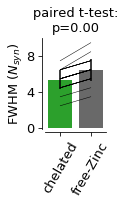

In [18]:
fig, ax, pval = ge.related_samples_two_conditions_comparison(FWHM['chelatedZn'], FWHM['freeZn'],
                                             color1=ge.green, color2='dimgrey',
                                             xticks_labels=['chelated', 'free-Zinc'],
                                             ylabel='FWHM ($N_{syn}$)',
                                            xticks_rotation=60)
print('from paired t-test, pval=', pval)